---

title: 理解卡方分布
date: 2024-09-29
author: 郝鸿涛
slug: chi2
draft: false
toc: true
tags: 统计学

---

## 方差分布

我们上次讲到了[标准误和正态分布](/cn/2024/09/24/clt/)。在其中，我们只看了样本平均值 ($\bar{X}$) 的分布，没有看样本方差 ($S^2$) 的分布。这次我们来看一下样本方差的分布有什么规律。

依然，我们以问题为导向。

>全球人类的智商分布符合正态分布， $\mathcal{N}(100, 15^2)$。我们从全球 $80$ 亿人中随机抽取 $100$ 个人，这 $100$ 人智商的方差大于等于 $250$ 的概率是多少？

首先，我们再次回到智商的正态分布图：

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(42)

# Parameters for the normal distribution
mean = 100       # Mean of the distribution
std_dev = 15    # Standard deviation of the distribution
size = 100000    # Number of data points

# Generate the data
data = np.random.normal(mean, std_dev, size)

population_mu = np.mean(data)
population_var = np.var(data)

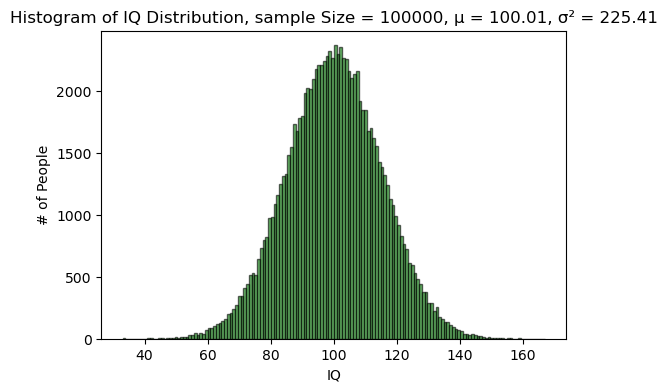

In [28]:
# Create a histogram of the data
plt.figure(figsize=(6, 4))
plt.hist(data, bins="auto", density=False, 
         alpha=0.6, color='g', edgecolor='black')

# Add titles and labels
plt.title(f"Histogram of IQ Distribution, sample Size = {size}, "\
          f"μ = {population_mu:.2f}, σ² = {population_var:.2f}")
plt.xlabel('IQ')
plt.ylabel('# of People')

# Show the plot
plt.show()

假设我们从母体中抽取 $M$ 个大小为 $N$ 的样本。也就是说，从母体中，每次抽取 $N$ 个人，重复 $M$ 次。每次是一个样本，其方差计算公式为：

$$
S^2 = \frac{1}{N-1} \sum_{i=1}^{N} (X_i - \bar{X})^2
$$

其中：

$N$ 是样本大小

$\bar{X}$ 是样本平均值

$X_i$ 代表样本中第 $i$ 个人的智商

下面，我们设 $M = 2000$，然后取不同的 $N$，画出 $S^2$ 的分布图。

In [29]:
def obtain_sample_vars(data, sample_size, num_samples):
    """sample from data, each time to get a sample of sample_size 
    and calcuate the sample's variance.
    Continue for num_samples times. 
    """
    sample_vars = np.zeros(num_samples)
    for i in range(num_samples):
        sample = np.random.choice(data, size=sample_size, replace=False)
        sample_vars[i] = np.var(sample, ddof=1)
    return sample_vars

In [30]:
num_samples = 2000
sample_sizes = [10, 100, 1000, 10000]
sample_vars = {size: obtain_sample_vars(
    data, size, num_samples) for size in sample_sizes}

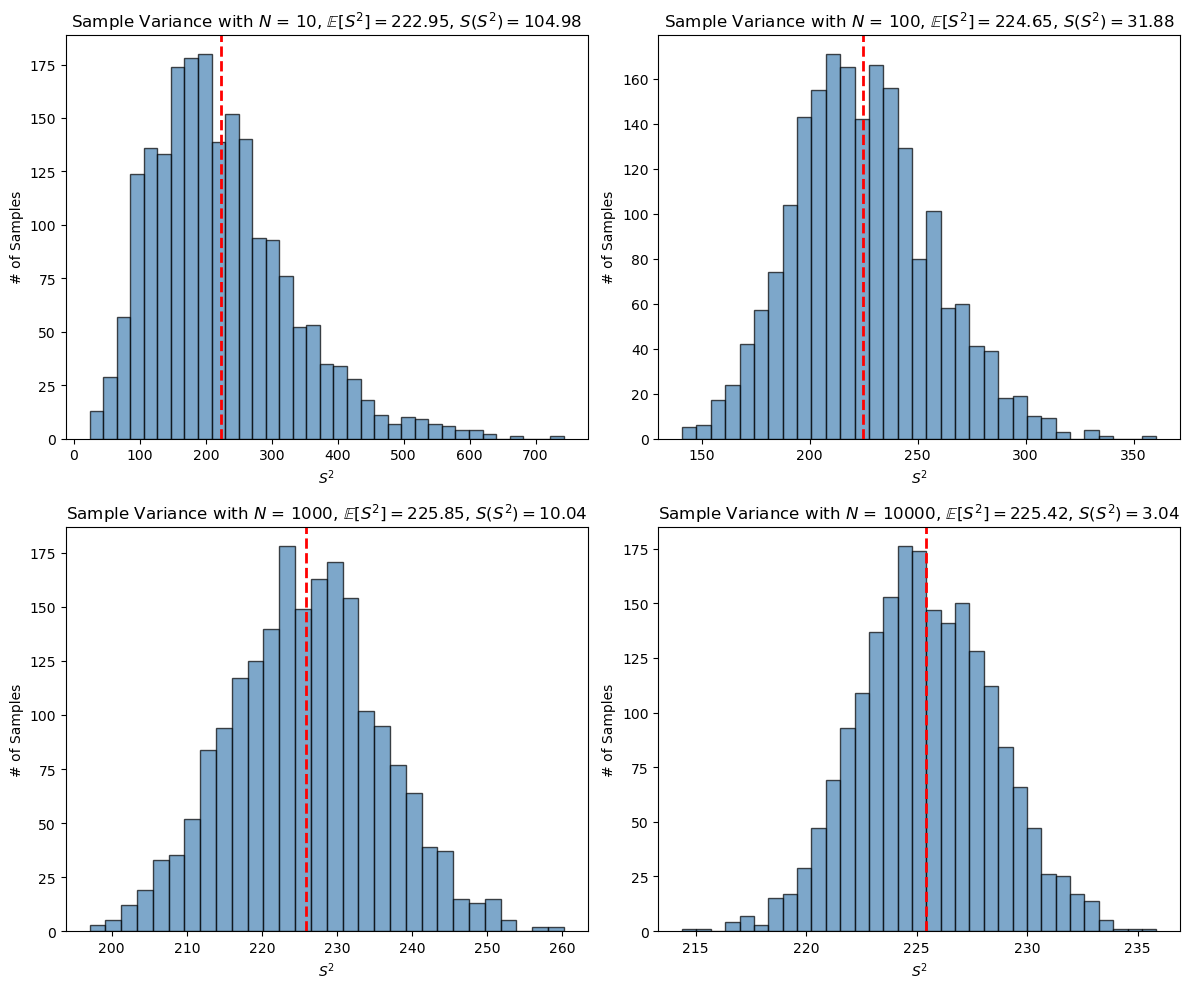

In [31]:
# Plotting
plt.figure(figsize=(12, 10))

# Create subplots
for i, size in enumerate(sample_sizes):
    sub_data = sample_vars[size]
    mu = np.mean(sub_data)
    sigma = np.std(sub_data)
    plt.subplot(2, 2, i + 1)  # 2x2 grid, subplot index starts at 1
    plt.hist(sub_data, bins="auto", density=False, 
             alpha=0.7, color='steelblue', edgecolor='black')
    # Plot vertical line at the mean
    plt.axvline(mu, color='red', linestyle='--', linewidth=2)
    plt.title(rf'Sample Variance with $N$ = {size}, '
              rf'$\mathbb{{E}}[S^2] = {mu:.2f}$, '
              rf'$S (S^2) = {sigma:.2f}$') 
    plt.xlabel('$S^2$')
    plt.ylabel('# of Samples')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [32]:
print(f"母体平均值 (μ) = {population_mu:.2f}, 母体方差 (σ²) = {population_var:.2f}")
for sample_size in sample_sizes:
    sub_data = sample_vars[sample_size]
    sample_mean = np.mean(sub_data)
    sample_var = np.var(sub_data)
    sample_var_estimates = 2*population_var**2/(sample_size - 1)

    print(f"N = {sample_size}, S² 的平均值 = {sample_mean:.2f}, "\
          f"S² 方差 = {sample_var:.2f}, " \
          f"2*σ⁴/(N-1) = {sample_var_estimates:.2f}") 

母体平均值 (μ) = 100.01, 母体方差 (σ²) = 225.41
N = 10, S² 的平均值 = 222.95, S² 方差 = 11019.87, 2*σ⁴/(N-1) = 11290.60
N = 100, S² 的平均值 = 224.65, S² 方差 = 1016.65, 2*σ⁴/(N-1) = 1026.42
N = 1000, S² 的平均值 = 225.85, S² 方差 = 100.72, 2*σ⁴/(N-1) = 101.72
N = 10000, S² 的平均值 = 225.42, S² 方差 = 9.24, 2*σ⁴/(N-1) = 10.16


以上，我们看到：

$$\mathrm{E}[S^2] = \sigma^2$$

也就是说当 $N \ge 2$ 时，$S^2$ 的平均值和母体方差是 ($\sigma^2$) 基本上是一样的。

$S^2$ 的方差基本上符合这样的规律：

$$Var(S^2) = \frac{2 \cdot \sigma^4}{N-1}$$

另外，我们也看到，当 $N$ 比较大的时候，$S^2$ 的分布越来越趋近于正态分布：

$$S^2 \sim \mathcal{N} \left(\sigma^2, \frac{2 \cdot \sigma^4}{N-1} \right)$$

但是当 $N$ 小的时候，明显无法用正态分布来描述 $S^2$ 的分布：

In [33]:
num_samples = 2000
sample_sizes = [3, 5, 10, 20]
sample_vars = {size: obtain_sample_vars(
    data, size, num_samples) for size in sample_sizes}

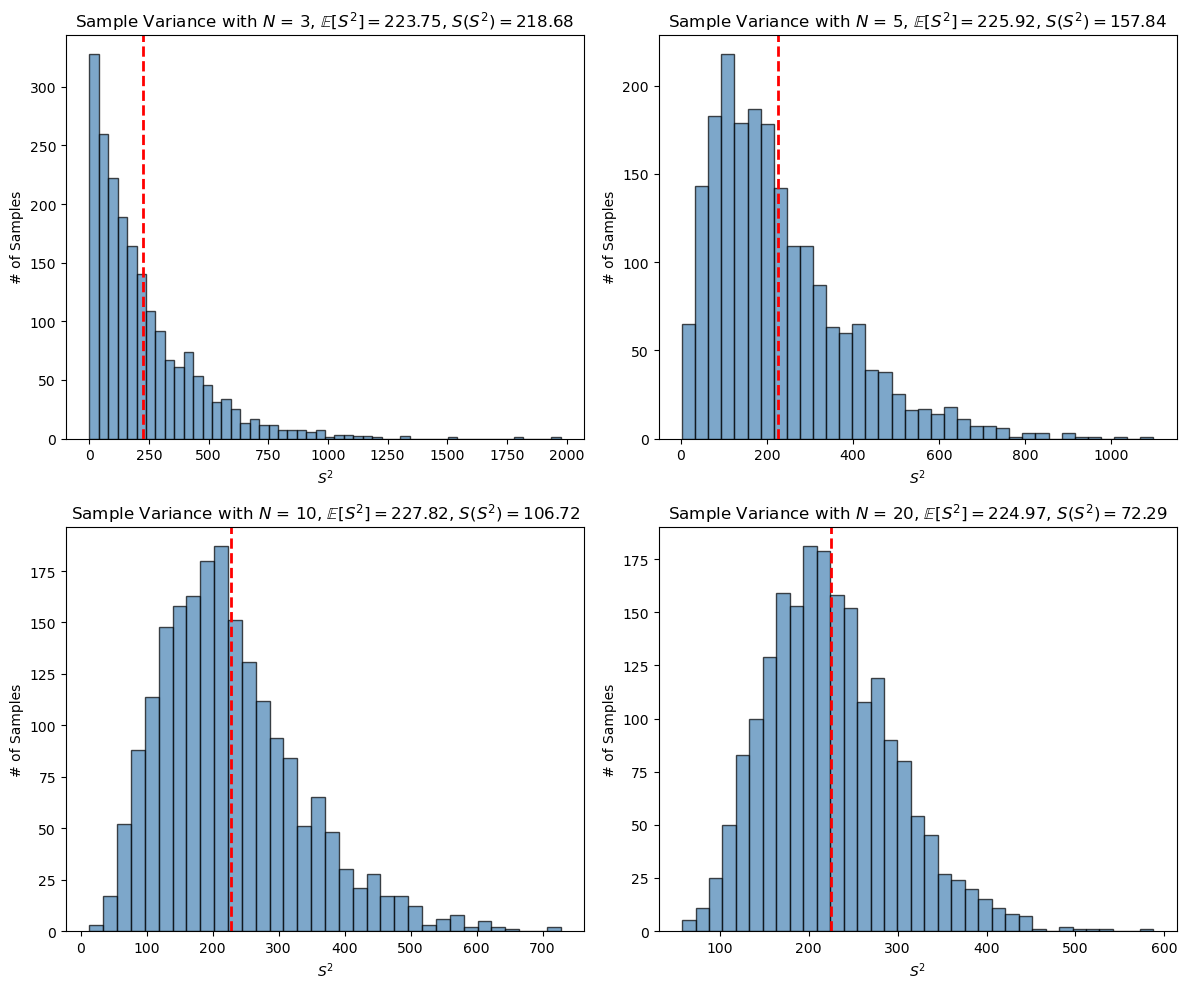

In [34]:
# Plotting
plt.figure(figsize=(12, 10))

# Create subplots
for i, size in enumerate(sample_sizes):
    sub_data = sample_vars[size]
    mu = np.mean(sub_data)
    sigma = np.std(sub_data)
    plt.subplot(2, 2, i + 1)  # 2x2 grid, subplot index starts at 1
    plt.hist(sub_data, bins="auto", density=False, 
             alpha=0.7, color='steelblue', edgecolor='black')
    # Plot vertical line at the mean
    plt.axvline(mu, color='red', linestyle='--', linewidth=2)
    plt.title(rf'Sample Variance with $N$ = {size}, '
              rf'$\mathbb{{E}}[S^2] = {mu:.2f}$, '
              rf'$S (S^2) = {sigma:.2f}$') 
    plt.xlabel('$S^2$')
    plt.ylabel('# of Samples')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

<!-- Is my understanding correct?

when N is large, no matter it is sample mean or sample variance, the distribution is just like a normal distribution. For sample variance, we can model the distribution as a normal dist with mean of sigma^2 and variance of 2*sigma^4/N-1

however, when N is small,  -->

该怎么解决这个问题？

## 卡方分布

我们现在跳出来，暂时不去想现在这个问题，而来了解一下[卡方分布](https://zh.wikipedia.org/zh-hans/%E5%8D%A1%E6%96%B9%E5%88%86%E4%BD%88)。

假设我们从标准正态分布 $\mathcal N(0, 1)$ 中随机抽取 $k$ 个数，$Z_1, ... , Z_k$ 然后求他们的平方和

$$Q = \sum_{i=1}^{k} Z_{i}^{2}$$

我们说 $Q$ 服从自由度为 $k$ 的卡方分布，$\chi_{k}^{2}$。


In [35]:
# Parameters for the normal distribution
mean = 0       # Mean of the distribution
std_dev = 1    # Standard deviation of the distribution
size = 100000    # Number of data points

# Generate the data
data = np.random.normal(mean, std_dev, size)

population_mu = np.mean(data)
population_var = np.var(data)

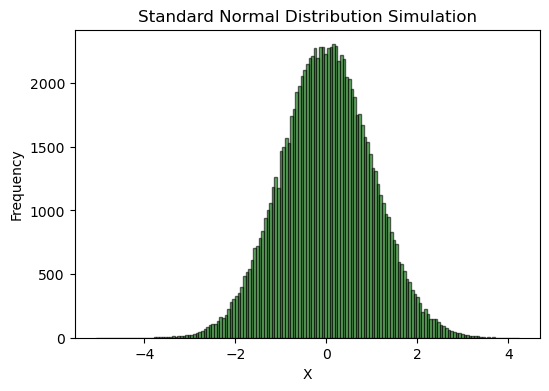

In [36]:
# Create a histogram of the data
plt.figure(figsize=(6, 4))
plt.hist(data, bins="auto", density=False, 
         alpha=0.6, color='g', edgecolor='black')

# Add titles and labels
plt.title(f"Standard Normal Distribution Simulation")
plt.xlabel('X')
plt.ylabel('Frequency')

# Show the plot
plt.show()

<!-- 以下是精确的概率密度图： -->

接下来，我们抽样。我们分别看一下 $k = 1, 2, 3, 5, 10, 20$ 的情况。每种情况我们抽 $2000$ 个样本。

In [37]:
def obtain_q(data, sample_size, num_samples):
    """sample from data, each time to get a sample of sample_size (k)
    and calcuate Q.
    Continue for num_samples times. 
    """
    qs = np.zeros(num_samples)
    for i in range(num_samples):
        sample = np.random.choice(data, size=sample_size, replace=False)
        qs[i] = sum(k**2 for k in sample)
    return qs

In [38]:
num_samples = 2000
sample_sizes = [1, 2, 3, 5, 10, 20]
qs = {size: obtain_q(
    data, size, num_samples) for size in sample_sizes}

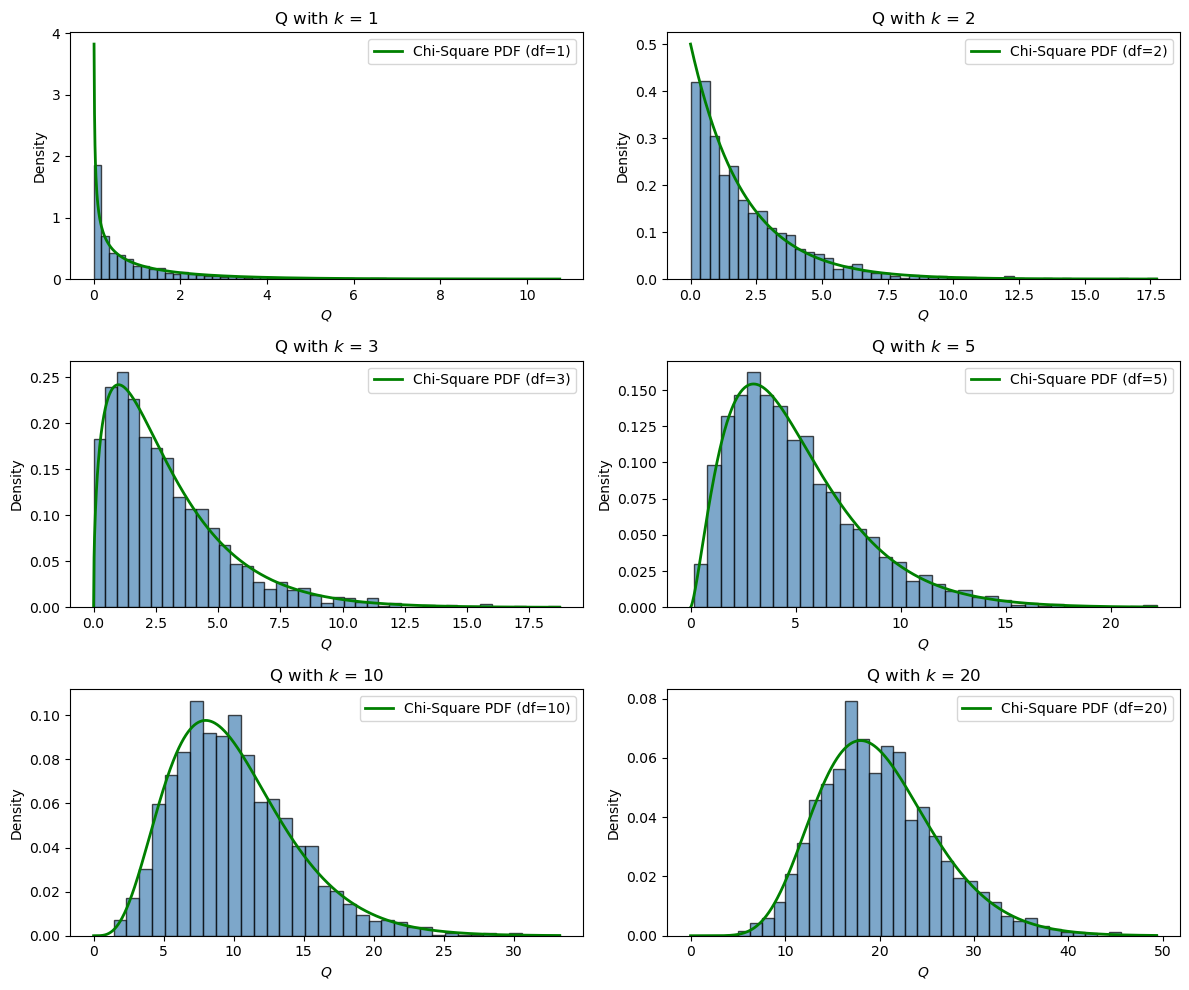

In [39]:
from scipy.stats import chi2

# Plotting
plt.figure(figsize=(12, 10))


# Create subplots
for i, size in enumerate(sample_sizes):
    sub_data = qs[size]
    plt.subplot(3, 2, i + 1)  # 2x2 grid, subplot index starts at 1
    plt.hist(sub_data, bins="auto", density=True, 
             alpha=0.7, color='steelblue', edgecolor='black')
    
    # Plot the theoretical chi-square distribution line
    x = np.linspace(0, np.max(sub_data), 1000)  # Define the x-axis range
    plt.plot(x, chi2.pdf(x, df=size), 
             color="green", lw=2, 
             label=f'Chi-Square PDF (df={size})')  # Plot PDF line

    plt.title(rf'Q with $k$ = {size}') 
    plt.xlabel('$Q$')
    plt.ylabel('Density')
    plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

科学家根据标准正态分布的特性[推导出了](https://en.wikipedia.org/wiki/Proofs_related_to_chi-squared_distribution)卡方分布的概率密度函数:

$$f(x; k) = \frac{1}{2^{k/2} \Gamma(k/2)} x^{(k/2) - 1} e^{-x/2}, \quad \text{for } x \geq 0$$

其中 $x$ 就是 $X$ 轴上的任意数字。$k$ 是自由度，也就是我们上面的例子中每次随机抽取几个数。

$\Gamma$ 函数的定义：

$$\Gamma(n) = \int_0^{\infty} t^{n-1} e^{-t} \, dt$$

上面我把精确的卡方分布密度函数也画出来了。

上面是从  $\mathcal N(0, 1)$ 随机抽样，那如果换成更普遍的情况呢？ 

假设我们从正态分布 $\mathcal N(\mu, \sigma^2)$ 中随机抽取 $k$ 个数，$X_1, ... , X_k$。

$\sum_{X_i}^{2}$ 确实不是卡方分布，但是

$$Z_i = \frac{X_i - \mu}{\sigma}$$

$$Q = \sum_{i=1}^{k} Z_{i}^{2}$$

$Q$ 依旧符合卡方分布。

继续假设，如果我们不知道母体的平均值 ($\mu$) 但是知道 $\sigma$，也就是说我们只能用样本平均值 $\bar{X}$ 来获取 $Z$ 的近似值:

$$T_i = \frac{X_i - \bar{X}}{\sigma}$$

统计学家证明

$$Q = \sum_{i=1}^{k} T_{i}^{2} = \sum_{i=1}^{k} \frac{(X_i - \bar{X})^2}{\sigma^2}$$

的分布依旧是一个卡方分布，但是自由度要减去一：

$$Q \sim \chi_{k-1}^{2}$$

因为

$$S^2 = \frac{\sum_{i=1}^{k} (X_i - \bar{X})^2}{k-1}$$

所以

$$Q = \frac{S^2 (k-1)}{\sigma^2}$$

所以，我们最后的结论是：

$$\frac{S^2 (k-1)}{\sigma^2} \sim \chi_{k-1}^{2}$$

也就是说 $\frac{S^2 (k-1)}{\sigma^2}$ 服从自由度为 $k-1$ 的卡方分布。其中

$k$ 是样本量

$S^2$ 是样本方差

$\sigma$ 是母体标准差

## 解决问题

现在我们回到最初的问题：

>全球人类的智商分布符合正态分布， $\mathcal{N}(100, 15^2)$。我们从全球 $80$ 亿人中随机抽取 $100$ 个人，这 $100$ 人智商的方差大于等于 $250$ 的概率是多少？

我们看到 $k=100$。$S^2 \ge 250 $ 的概率也就是 在一个自由度为 $99$ 的卡方分布中，$x \ge \frac{S^2 (k-1)}{\sigma^2} = \frac{250 \times 99}{15^2}$ 的概率。


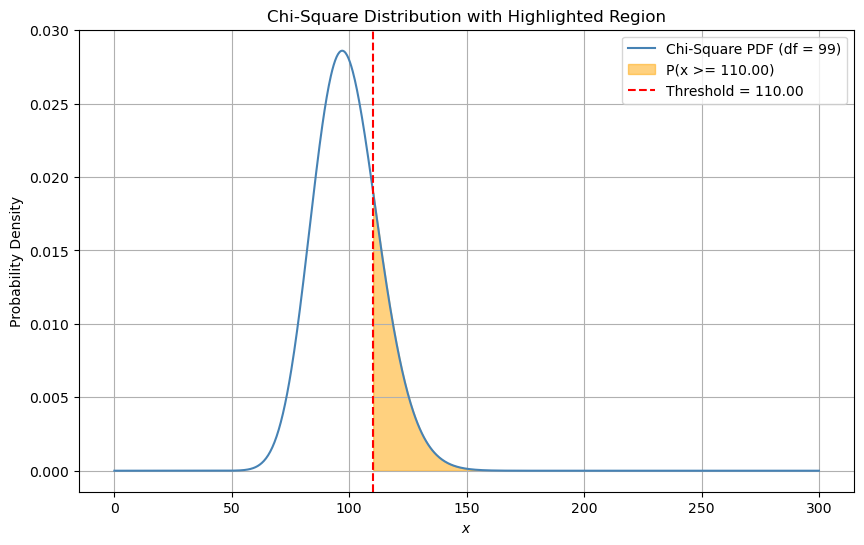

In [40]:
df = 99
threshold = (250*df)/(15**2)
prob = 1 - chi2.cdf(threshold, df)
x = np.linspace(0, 300, 1000)
y = chi2.pdf(x, df)
plt.figure(figsize = (10, 6))
plt.plot(x, y, label=f'Chi-Square PDF (df = {df})', color = "steelblue")
plt.fill_between(x, y, 
                #  where=np.logical_or(x >= threshold, x <= 80), 
                 where=(x >= threshold), 
                 color='orange', 
                 alpha = 0.5, 
                 label=f'P(x >= {threshold:.2f})')
plt.title('Chi-Square Distribution with Highlighted Region')
plt.xlabel('$x$')
plt.ylabel('Probability Density')
plt.axvline(threshold, color="red", 
            linestyle='--', 
            label=f'Threshold = {threshold:.2f}')
plt.legend()
plt.grid(True)
plt.show()


In [41]:
prob

0.2114202344878623

## 总结

我们从一个均值为 $\mu$、方差为 $\sigma^2$ 的正态分布 $\mathcal N(\mu, \sigma^2)$ 中随机取 $k$ 个[独立同分布](https://zh.wikipedia.org/wiki/%E7%8B%AC%E7%AB%8B%E5%90%8C%E5%88%86%E5%B8%83) (i.i.d) 的随机变量 $X_1, X_2, ... , X_k$。这些随机变量构成一个样本。该样本的方差为 $S^2$。取无数个样本。

对样本的方差进行标准化：

$$Q = \frac{(k-1) S^2}{\sigma^2}$$

$Q$ 服从自由度为 $k-1$ 的卡方分布：

$$Q \sim \chi_{k-1}^{2}$$

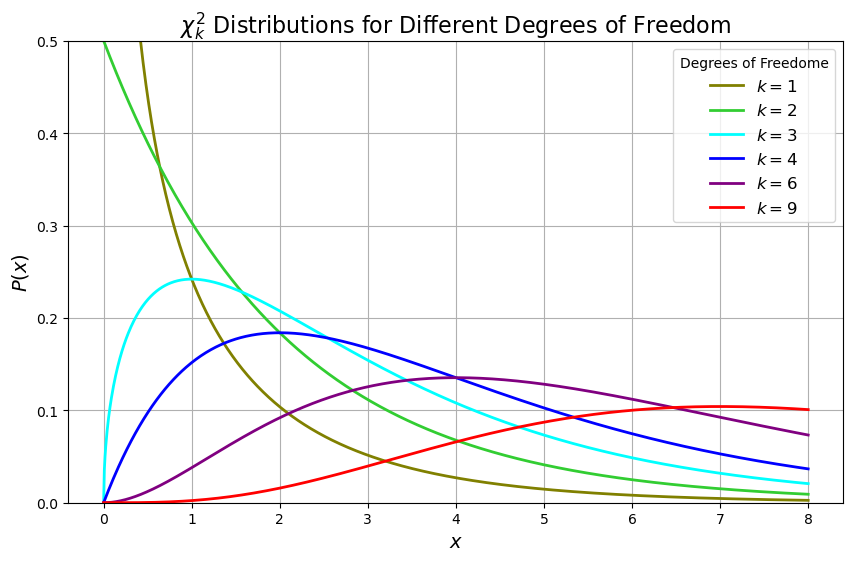

In [42]:
dfs = [1, 2, 3, 4, 6, 9]
x = np.linspace(0, 8, 1000)  # Define the x-axis range
plt.figure(figsize=(10, 6))
# Colors for each chi-square distribution
colors = ['olive', 'limegreen', 'cyan', 'blue', 'purple', 'red']

for df, color in zip(dfs, colors):
    plt.plot(x, chi2.pdf(x, df=df), color=color, lw=2, 
         label=rf'$k={df}$')  # Plot PDF line
    
plt.xlabel(r'$x$', fontsize = 14)
plt.ylabel(r'$P(x)$', fontsize = 14)
plt.title(r'$\chi^2_k$ Distributions for Different Degrees of Freedom', fontsize = 16)
plt.legend(title = 'Degrees of Freedome', fontsize = 12)
plt.grid(True)
plt.ylim(0, 0.5)  # Restrict y-axis limits

plt.show()